In [12]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [61]:
from PIL import Image
import matplotlib.pylab as plt

import numpy as np
import scipy as sp
from scipy.ndimage import rotate

import pandas as pd

import os
import tqdm

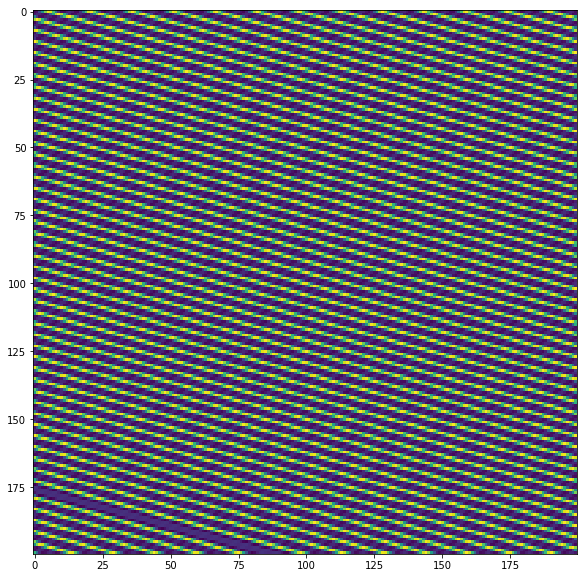

In [42]:
mask = np.zeros((img.size))
mask = np.zeros((200,200))

for i in range(mask.shape[0]):
    if i % 4 != 0:
        continue
    for j in range(mask.shape[1]):
        mask[i][j] = 1

angle = -30.24/2

mask = rotate(mask,reshape=False, angle=angle,mode='mirror')        

plt.imshow(mask)

In [70]:
np.asarray(img)[0:20,0:20]

array([[ 732,  716,  692,  749,  664,  548,  595,  617,  697,  715,  682,
         587,  697,  803,  757,  601,  709,  662,  580,  707],
       [ 591,  565,  755,  856,  732,  617,  589,  521,  575,  598,  479,
         447,  633,  775,  654,  666,  703,  618,  720,  664],
       [ 409,  413,  589,  574,  747,  684,  600,  529,  618,  641,  497,
         443,  551,  577,  523,  555,  588,  582,  707,  699],
       [ 424,  484,  444,  453,  546,  635,  510,  611,  649,  663,  618,
         687,  611,  559,  491,  435,  410,  534,  700,  767],
       [ 507,  561,  605,  557,  590,  421,  444,  596,  559,  570,  648,
         726,  707,  777,  607,  441,  462,  544,  588,  518],
       [ 503,  641,  734,  699,  628,  393,  482,  563,  471,  483,  424,
         473,  533,  730,  621,  531,  654,  594,  597,  508],
       [ 478,  543,  671,  711,  527,  477,  463,  527,  562,  524,  395,
         418,  464,  495,  493,  587,  714,  735,  793,  642],
       [ 559,  631,  661,  570,  472,  50

(2048, 2048)


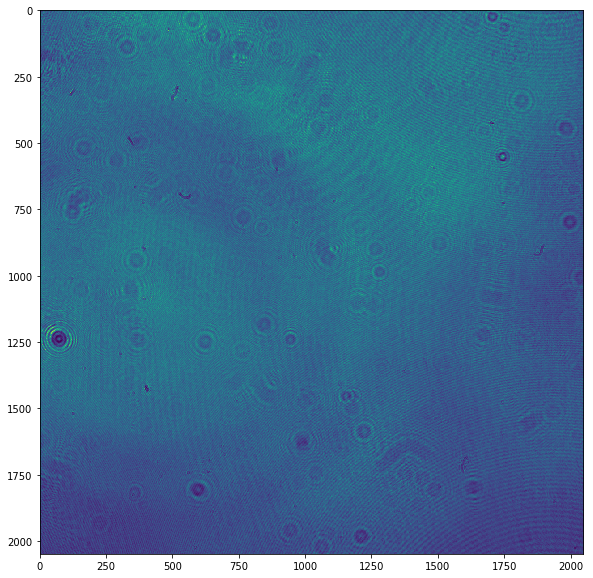

In [47]:
img = Image.open('data\\big_diffuser\\no diffuser 800ms.TIF')
print(img.size)
plt.imshow(np.asarray(img))

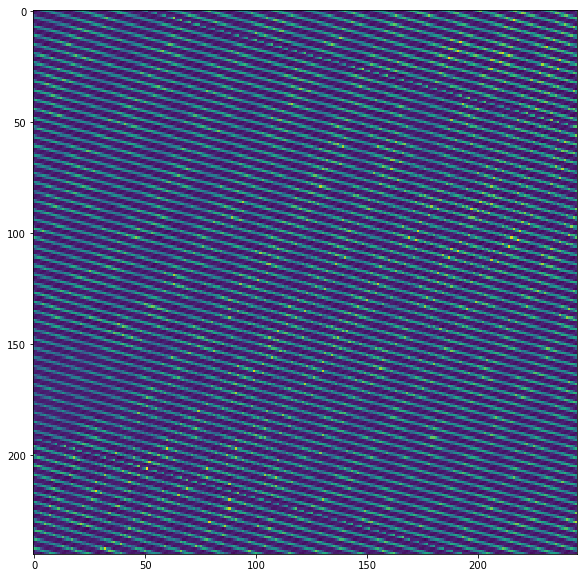

In [34]:
plt.imshow(np.asarray(img)[0:245,0:245]*mask)

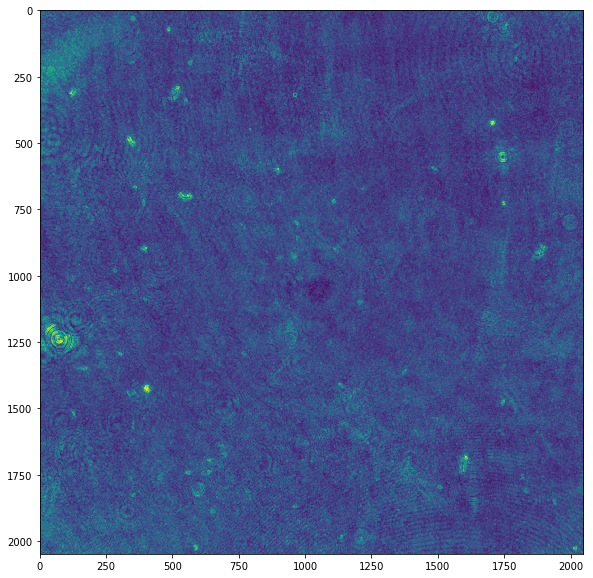

In [45]:
def get_contrast_region(patch):
    return (np.max(patch)-np.min(patch))/(np.max(patch)+np.min(patch))

def get_contrast(img,patch_width):
    contrast = np.zeros(img.shape)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            contrast[i][j] = get_contrast_region(img[max(0,i-patch_width):min(i+patch_width,img.shape[0]),
                                                     max(0,j-patch_width):min(j+patch_width,img.shape[1])])
    
    return contrast

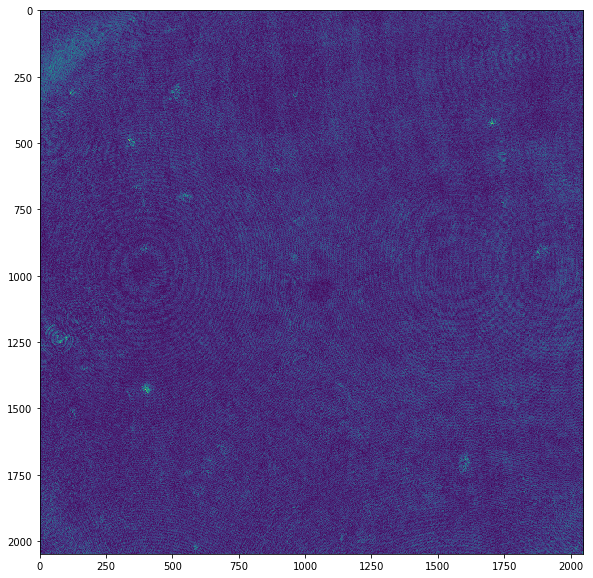

In [48]:
plt.imshow(get_contrast(np.asarray(img),1))

In [49]:
contrast_3 = get_contrast(np.asarray(img),1)
contrast_5 = get_contrast(np.asarray(img),2)
contrast_9 = get_contrast(np.asarray(img),4)

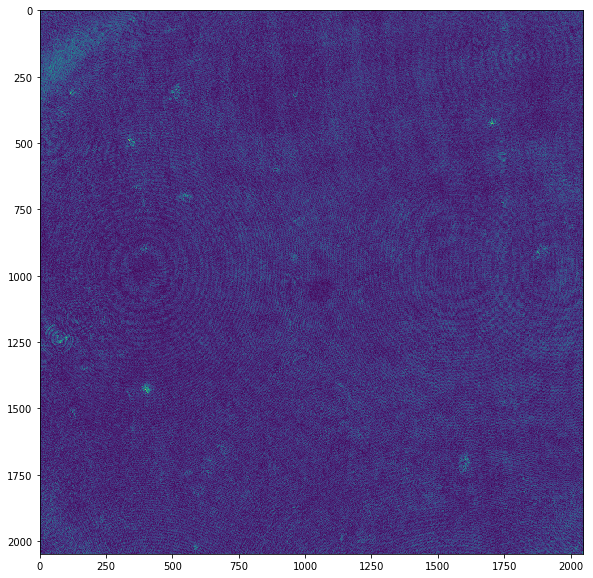

In [50]:
plt.imshow(contrast_3)

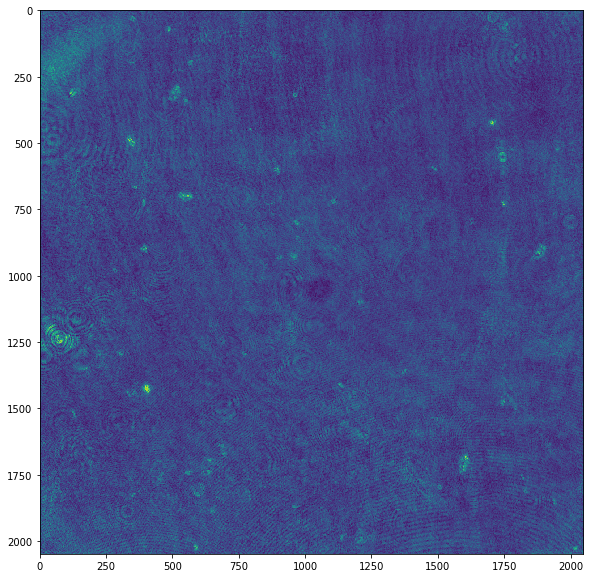

In [51]:
plt.imshow(contrast_5)

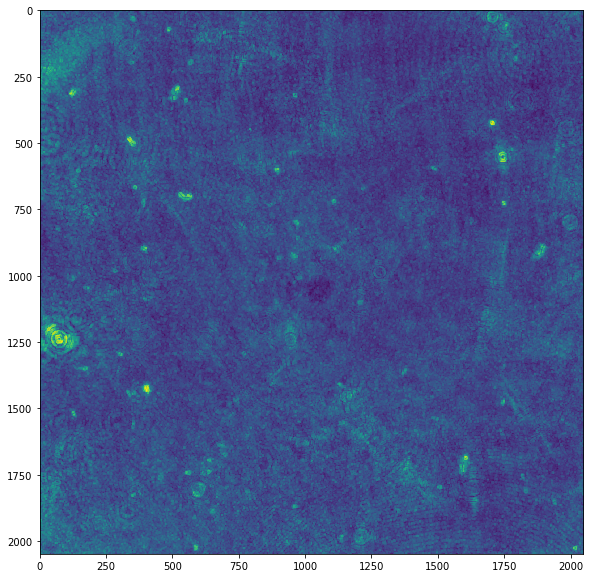

In [53]:
plt.imshow(contrast_9)

In [57]:
num_pix = np.asarray(img).shape[0] * np.asarray(img).shape[1]
print(np.sum(contrast_3)/num_pix)
print(np.sum(contrast_5)/num_pix)
print(np.sum(contrast_9)/num_pix)

0.11163011677434007
0.22517050932367244
0.30462650995326435


In [60]:
list_files = []
list_contrast_3 = []
list_contrast_5 = []
list_contrast_9 = []

for file in os.listdir("data//big_diffuser"):
    list_files.append(file)
    i = np.asarray(Image.open(f'data//big_diffuser//{file}'))
    
    list_contrast_3.append(get_contrast(i,1))
    list_contrast_5.append(get_contrast(i,2))
    list_contrast_9.append(get_contrast(i,4))
    
dictionary = {'filename':list_files,'width_3':list_contrast_3,'width_5':list_contrast_5,'width_9':list_contrast_9}

In [64]:
list_sum_3 = []
list_sum_5 = []
list_sum_9 = []

for i in list_contrast_3:
    list_sum_3.append(np.sum(i))
    
for i in list_contrast_5:
    list_sum_5.append(np.sum(i))
    
for i in list_contrast_9:
    list_sum_9.append(np.sum(i))

d = {'filename':list_files,'width_3':list_sum_3,'width_5':list_sum_5,'width_9':list_sum_9}
    
df = pd.DataFrame(data=d)
df

filename       width_3       width_5       width_9
0     diffuse 10cm 800ms.TIF  1.621940e+06  2.956656e+06  3.534634e+06
1      diffuse 1cm 1.98s.TIF  8.253701e+05  1.717858e+06  2.543984e+06
2      diffuse 1cm 4.14s.TIF  6.013648e+05  1.403988e+06  2.329294e+06
3      diffuse 1cm 800ms.TIF  8.119344e+05  1.684423e+06  2.495961e+06
4      diffuse 3cm 1.98s.TIF  5.404193e+05  1.086773e+06  1.534005e+06
5      diffuse 3cm 4.14s.TIF  6.519298e+05  1.273919e+06  1.721748e+06
6      diffuse 3cm 800ms.TIF  7.228183e+05  1.434814e+06  2.030586e+06
7      diffuse 4cm 1.98s.TIF  7.050616e+05  1.550526e+06  2.429834e+06
8      diffuse 4cm 4.14s.TIF  6.859150e+05  1.521267e+06  2.403623e+06
9      diffuse 4cm 800ms.TIF  7.963440e+05  1.671138e+06  2.500355e+06
10     diffuse 5cm 1.98s.TIF  8.459006e+05  1.931506e+06  2.946998e+06
11     diffuse 5cm 4.14s.TIF  8.140390e+05  1.885452e+06  2.911914e+06
12     diffuse 5cm 800ms.TIF  9.136389e+05  2.020158e+06  2.991468e+06
13     diffuse 6cm 1.98s.TIF  1.005726e+06  2.252000e+06  3.225786e+06
14     diffuse 6cm 4.14s.TIF  9.580602e+05  2.176480e+06  3.156551e+06
15     diffuse 6cm 800ms.TIF  9.889367e+05  2.208226e+06  3.147069e+06
16     diffuse 7cm 1.98s.TIF  1.091107e+06  2.410691e+06  3.316888e+06
17     diffuse 7cm 4.14s.TIF  1.153518e+06  2.489274e+06  3.368958e+06
18     diffuse 7cm 800ms.TIF  1.178574e+06  2.495601e+06  3.331064e+06
19     diffuse 8cm 800ms.TIF  1.303905e+06  2.650851e+06  3.397561e+06
20     diffuse 9cm 800ms.TIF  1.488179e+06  2.846183e+06  3.489409e+06
21  diffuser 2.5c, 800ms.TIF  7.906236e+05  1.465279e+06  1.796998e+06
22  diffuser 2.5cm 1.98s.TIF  7.624283e+05  1.410338e+06  1.723046e+06
23  diffuser 2.5cm 4.14s.TIF  2.722649e+05  5.545771e+05  8.290891e+05
24     no diffuser 800ms.TIF  4.682106e+05  9.444336e+05  1.277696e+06

In [68]:
df.to_csv('analysis//contrast_measurements.csv')

<Figure size 1440x720 with 0 Axes>

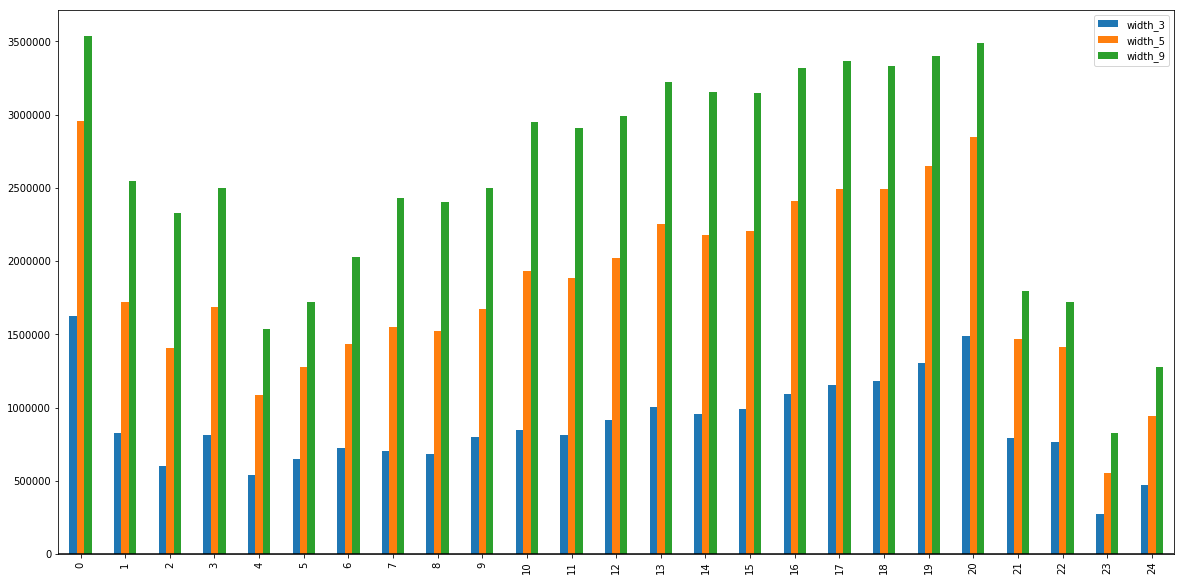

In [67]:
plt.figure()
df.plot(kind='bar')
plt.axhline(0, color='k')
plt.legend(loc='best')

In [71]:
for file in os.listdir("data//big_diffuser"):
    i = np.asarray(Image.open(f'data//big_diffuser//{file}'))
    print(file)
    print(np.max(i))
    print(np.min(i))

diffuse 10cm 800ms.TIF
2061
18
diffuse 1cm 1.98s.TIF
3565
35
diffuse 1cm 4.14s.TIF
3903
80
diffuse 1cm 800ms.TIF
1567
14
diffuse 3cm 1.98s.TIF
2677
35
diffuse 3cm 4.14s.TIF
3921
69
diffuse 3cm 800ms.TIF
1389
16
diffuse 4cm 1.98s.TIF
3575
35
diffuse 4cm 4.14s.TIF
3921
72
diffuse 4cm 800ms.TIF
1753
15
diffuse 5cm 1.98s.TIF
3770
38
diffuse 5cm 4.14s.TIF
3925
67
diffuse 5cm 800ms.TIF
1707
15
diffuse 6cm 1.98s.TIF
3643
36
diffuse 6cm 4.14s.TIF
3932
81
diffuse 6cm 800ms.TIF
1915
18
diffuse 7cm 1.98s.TIF
3739
39
diffuse 7cm 4.14s.TIF
3934
75
diffuse 7cm 800ms.TIF
2089
17
diffuse 8cm 800ms.TIF
2221
19
diffuse 9cm 800ms.TIF
2242
18
diffuser 2.5c, 800ms.TIF
913
16
diffuser 2.5cm 1.98s.TIF
2126
40
diffuser 2.5cm 4.14s.TIF
3643
92
no diffuser 800ms.TIF
1999
30
